<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/3_5_3_6_K_Means_Clustering_and_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**3.5 K-Means Clustering**

**Definition 3.5.1**

K-Means Clustering is an unsupervised learning algorithm that partitions a dataset into $𝑘$ distinct, non-overlapping clusters. The objective is to minimize the Within-Cluster Sum of Squares (WCSS), which measures the compactness of the clusters. Formally, the goal is to solve:
* $\text{WCSS} = \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \| \mathbf{x} - \boldsymbol{\mu}_i \|^2$

Where,
* $x$ represents data points
* $S_i$ is the set of points in cluster $i$
* $\boldsymbol{\mu}_i$ is the mean in cluster $i$

##K-Means Algorithm

**Mathematical Intuition 3.5.2**

The K-Means algorithm iteratively partitions the dataset into $𝑘$ clusters through the following steps:

1. Initialize Centroids: Select $𝑘$ initial centroids randomly from the dataset or using a method like K-Means++ to improve convergence.
2. Assign Clusters: Assign each data point to the nearest centroid based on Euclidean distance.
3. Update Centroids: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. Repeat: Repeat steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

**Example 3.5.1: Generate and Visualize Dataset**

Objective: Generate a synthetic dataset using make_blobs and visualizing it to understand the initial distribution of data points.

<ipython-input-1-45d32eb71a71>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


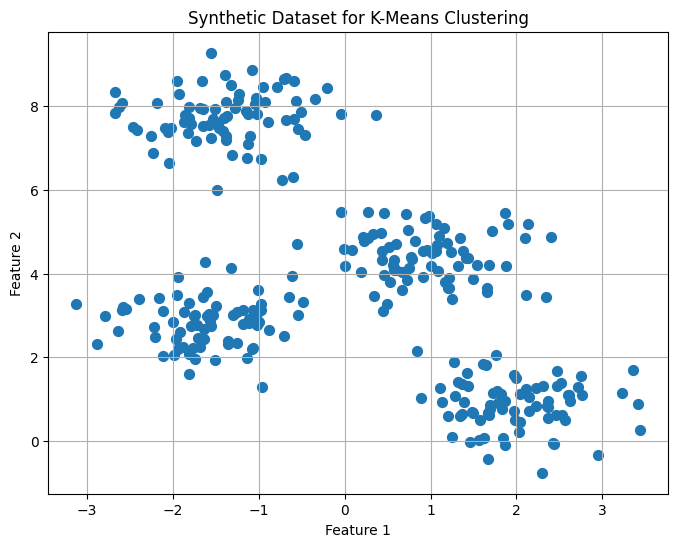

In [1]:
# K-Means Clustering: Generate and Visualize Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

**Example 3.5.1: Apply K-Means with Scikit-Learn**

Objective: Applying the K-Means algorithm using Scikit-Learn's KMeans class and visualize the resulting clusters along with their centroids.

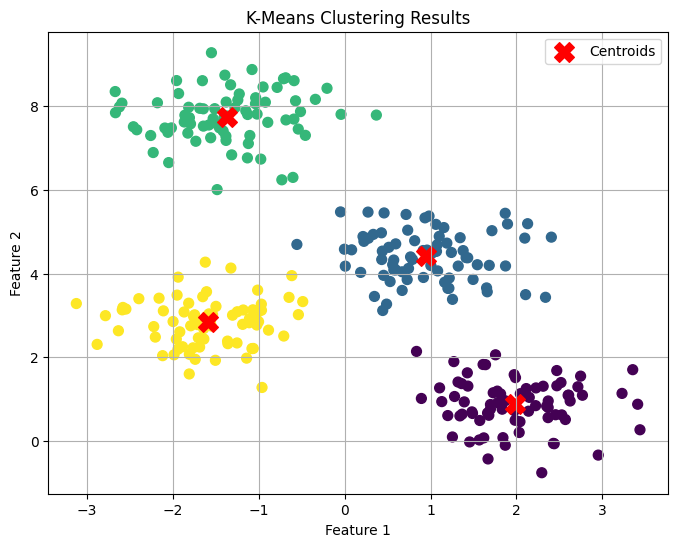

In [2]:
# K-Means Clustering: Apply K-Means with Scikit-Learn

from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

*Code Analysis*
1. Model Initialization:
 * n_clusters=4: Specifies the number of clusters.
 * init="k-means++": Initializes centroids using the K-Means++ method for better convergence.
 * max_iter=300: Sets the maximum number of iterations.
 * random_state=42: Ensures reproducibility.

2. Model Training and Prediction:
 * .fit_predict(X): Fits the model to the data and predicts cluster assignments.
3. Visualization:
 * Data points are colored based on their assigned clusters.
 * Centroids are marked with red "X" markers for clarity.

**Example 3.5.1: Determine Optimal Number of Clusters (Elbow Method)**

Objective: The Elbow Method helps in selecting the optimal number of clusters by plotting the WCSS against different values of $k$. The point where the rate of decrease sharply changes ("elbow") indicates the appropriate $k$.

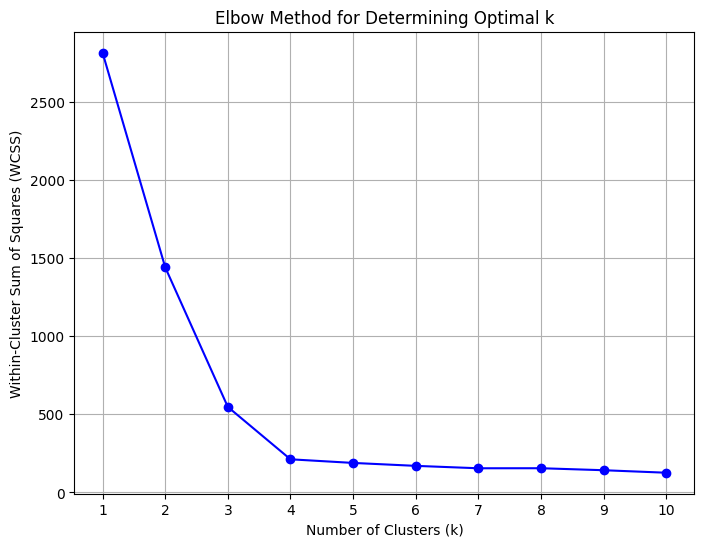

In [3]:
# K-Means Clustering: Determine Optimal Number of Clusters (Elbow Method)

wcss = []
K = range(1, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest centroid

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-')
plt.title("Elbow Method for Determining Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(K)
plt.grid(True)
plt.show()

*Code Analysis*
1. WCSS Calculation: For each $k$ from 1 to 10, the K-Means model is trained, and the corresponding WCSS (inertia_) is recorded.
2. Visualization:A line plot displays WCSS against the number of clusters.
The "elbow" point suggests the optimal $k$.

**Example 3.5.1: Silhouette Score for Clustering Quality**

Objective: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

In [4]:
# K-Means Clustering: Silhouette Score for Clustering Quality

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for k=4: {silhouette_avg:.4f}")

Silhouette Score for k=4: 0.6820


*Code Analysis*
1. Within-Cluster Sum of Squares (WCSS): Lower WCSS indicates more compact clusters. However, decreasing WCSS beyond the elbow point yields diminishing returns.
2. Silhouette Score: Complementary to the Elbow Method, the Silhouette Score provides a numerical metric to assess clustering quality. Higher scores correlate with better-defined clusters.

##**3.6: Support Vector Machine (SVM)**

**Definition 3.6.1**

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. In classification, SVM aims to find the optimal hyperplane that separates data points of different classes with the maximum margin. The margin is defined as the distance between the hyperplane and the nearest data points from each class, known as support vectors.

Mathematically, the goal is to solve:
* $\begin{aligned}
 \underset{\mathbf{w}, b}{\text{maximize}} \frac{2}{\|\mathbf{w}\|} \\
 \text{subject to}  ; y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i
\end{aligned}$

Where:
* $w$ is the weight vector perpendicular to the hyperplane
* $b$ is the bias term
* $y_i \in \{-1, 1\}$ are the class labels
* $\mathbf{x}_i$ are the feature vectors

**Example 3.6.1: Linear SVM**

Objective: Implement linear SVM using Scikit-Learn's SVC class on a synthetic binary classification dataset.

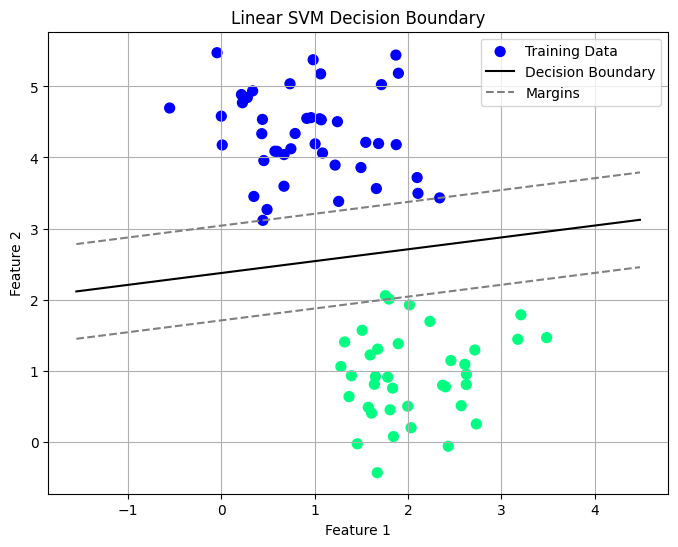

In [5]:
# Support Vector Machine (SVM): Linear SVM with Scikit-Learn

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset for binary classification
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6)
y[y == 0] = -1  # Convert labels to -1 and 1

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVM
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# Predict on training data
y_pred = svm.predict(X_train)

# Visualization of the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", s=50, label="Training Data")

# Extract the hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 30)
y_plot = -(w[0] * x_plot + b) / w[1]

# Plot the decision boundary
plt.plot(x_plot, y_plot, color="black", linestyle='-', label="Decision Boundary")

# Plot the margins
margin = 1 / np.linalg.norm(w)
y_margin_pos = y_plot + np.sqrt(1 + (w[0]/w[1])**2) * margin
y_margin_neg = y_plot - np.sqrt(1 + (w[0]/w[1])**2) * margin
plt.plot(x_plot, y_margin_pos, color="grey", linestyle='--', label="Margins")
plt.plot(x_plot, y_margin_neg, color="grey", linestyle='--')

plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

*Code Analysis*
1. Data Generation:
 * make_blobs creates 100 samples with 2 centers and a standard deviation of 0.6.
 * Labels are converted from 0 and 1 to -1 and 1 to align with SVM's convention.
2. Data Splitting:
 * The dataset is split into 80% training and 20% testing.
3. Model Training:
 * An SVC model with a linear kernel is instantiated and trained on the training data.
 * C=1: Regularization parameter controlling trade-off between achieving a low training error and a low testing error.
4. Visualization:
 * Data points are colored based on their class labels.
 * The decision boundary is plotted based on the learned weights and bias
 * Margins are plotted as dashed lines, representing the boundaries where support vectors lie.

**Example 3.6.2: Nonlinear SVM**

Objective: In datasets that are not linearly separable, kernel functions to transform the data into a higher-dimensional space where a linear decision boundary can be found.

Here, Radial Basis Function (RBF) kernel is used

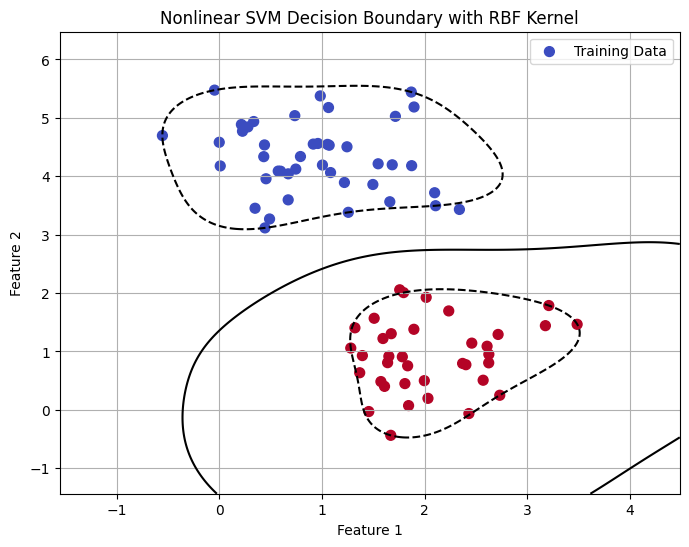

In [6]:
# Support Vector Machine (SVM): Nonlinear SVM with RBF Kernel

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=1)
svm_rbf.fit(X_train, y_train)

# Predict on training data
y_pred_rbf = svm_rbf.predict(X_train)

# Visualization of the nonlinear decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", s=50, label="Training Data")

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
plt.title("Nonlinear SVM Decision Boundary with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

*Code Analysis*
1. Model Training:
 * An SVC model with an RBF kernel is instantiated and trained.
 * gamma=0.5: Kernel coefficient for RBF.
 * C=1: Regularization parameter.
2. Visualization:
 * A mesh grid is created to evaluate the decision function across a range of values.
 * The decision boundary and margins are plotted using contour lines.
 * The plot shows how the RBF kernel allows for nonlinear separation of classes.

## Dual Problem Formulation

**Definition 3.6.2**

The Dual Problem in SVM transforms the primal optimization problem into a form that is often easier to solve, especially when dealing with high-dimensional data. It leverages the fact that the dual variables are related to the data points via Lagrange multipliers.

1. Primal Problem: $\begin{aligned}\underset{\mathbf{w}, b}{\text{minimize}} & \frac{1}{2} \|\mathbf{w}\|^2 \\ \text{subject to} &;  y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i
\end{aligned}$



2. Dual Problem:
$\begin{aligned} \underset{\alpha}{\text{maximize}}  \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \\
\text{subject to}  \sum_{i=1}^{n} \alpha_i y_i = 0, \\
 \alpha_i \geq 0, \quad \forall i
\end{aligned}$

Solving the dual problem typically involves quadratic programming.